In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('weather_flu_google_8.csv',na_values='NA')
df['cases']=df['total.specimens']*df['percent.positive']*.01
cleaned_df=df

In [23]:
corr=cleaned_df.corr()

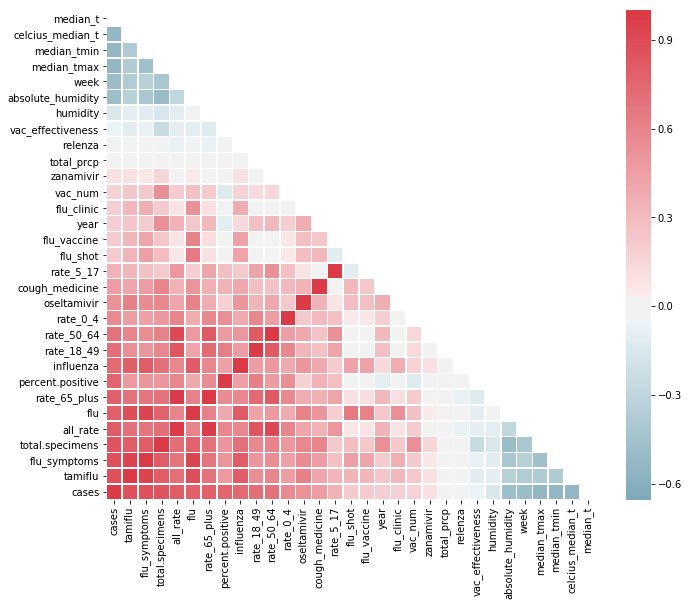

In [24]:
import matplotlib.pyplot as plt
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.sort_values(by='cases',axis=0,ascending=True).sort_values(by='cases',axis=1,ascending=False),mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)



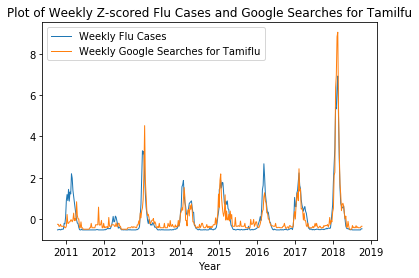

In [38]:
year_num = pd.to_numeric(cleaned_df['year'])+cleaned_df['week']/52
z=pd.DataFrame()
for col in cleaned_df.columns:
    z[col]=(cleaned_df[col]- cleaned_df[col].mean())/cleaned_df[col].std()
z.head()
plt.xlabel('Year')
plt.title('Plot of Weekly Z-scored Flu Cases and Google Searches for Tamilfu')
plt.plot(year_num,z['cases'],linewidth=1,label='Weekly Flu Cases')
plt.plot(year_num,z['tamiflu'],linewidth=1,label='Weekly Google Searches for Tamiflu')
plt.legend()
plt.show()

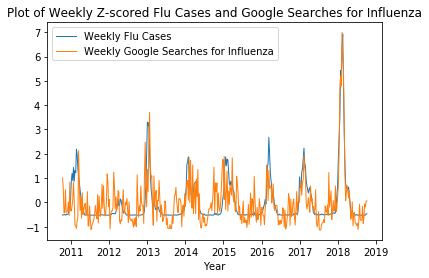

In [39]:
plt.xlabel('Year')
plt.title('Plot of Weekly Z-scored Flu Cases and Google Searches for Influenza')
plt.plot(year_num,z['cases'],linewidth=1,label='Weekly Flu Cases')
plt.plot(year_num,z['influenza'],linewidth=1,label='Weekly Google Searches for Influenza')
plt.legend()
plt.show()

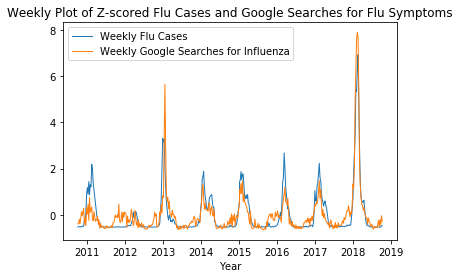

In [40]:
plt.xlabel('Year')
plt.title('Weekly Plot of Z-scored Flu Cases and Google Searches for Flu Symptoms')
plt.plot(year_num,z['cases'],linewidth=1,label='Weekly Flu Cases')
plt.plot(year_num,z['flu_symptoms'],linewidth=1,label='Weekly Google Searches for Influenza')
plt.legend()
plt.show()

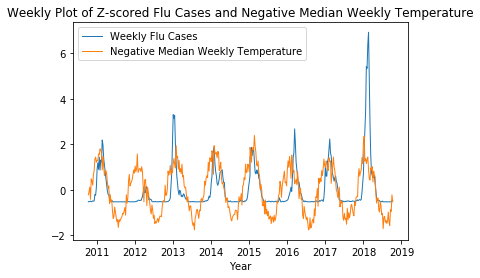

In [45]:
plt.xlabel('Year')
plt.title('Weekly Plot of Z-scored Flu Cases and Negative Median Weekly Temperature')
plt.plot(year_num,z['cases'],linewidth=1,label='Weekly Flu Cases')
plt.plot(year_num,-z['median_t'],linewidth=1,label='Negative Median Weekly Temperature')
plt.legend()
plt.show()

In [43]:
cleaned_df[['cases','median_t','humidity','absolute_humidity']].corr()

,cases,median_t,humidity,absolute_humidity
cases,1.000000,-0.537630,-0.148103,-0.474299
median_t,-0.537630,1.000000,0.280319,0.941304
humidity,-0.148103,0.280319,1.000000,0.475690
absolute_humidity,-0.474299,0.941304,0.475690,1.000000
